<a href="https://colab.research.google.com/github/UCREL/Session-6-LLM-Based-Emotion-Analysis/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/UCREL/Session-6-LLM-Based-Emotion-Analysis/blob/main/banner_llm4emotions_summer_school.png?raw=1)

# **Introduction**
With the advent the transformer based of large language models (LLMs) such as BERT, LLAMA, Gemini etc., the NLP community has tapped into these models for developing new techniques and methodologies for a wide range of NLP tasks. One key NLP task that can benefit from such resources is the Emotion Analysis, which is a highly challenging NLP task.  

In this tutorial, we will learn how to:
1. **Apply LLMs to emotion classification tasks**
2. **Evaluate the performance of different models**
3. **Fine-tune a model to perform better on specific classification tasks**

To achieve the objectives above, we will follow the steps below:

- [**Section 1: Preamble**](#preamble) - download tutorial materials and set path to working folder.

- [**Section 2: Emotion Dataset Analysis**](#dataset-analysis) - load and analyse example emotion dataset.

- [**Section 3: Emotion Classification**](#classification) - perform emotion classification with existing models.

- [**Section 4: Model Evaluation**](#evaluation) - evaluate model performances on the dataset.

- [**Section 5: Guide to Model Fine-tuning**](#fine-tuning) - a quick guide to fine-tuning an emotion LLM.

<a name="preamble"></a>
# **Section 1: Preamble**

## Downloading materials
To start, you need to download the materials required for this tutorial into our CoLab space. These include the datasets and the python scripts required to perform other tasks.

Let's walk you through the process with the following exercise...

---

### **Exercise: 🏋️**
Copy and paste these two lines of code to download materials from this session's [GitHub repo](https://github.com/UCREL/Session-6-LLM-Based-Emotion-Analysis/tree/main) and then change into our working directory `Session-6-LLM-Based-Emotion-Analysis`

#### **1. Clone the repository:**
```python
!git clone https://github.com/UCREL/Session-6-LLM-Based-Emotion-Analysis.git
```

In [1]:
# @title ##### 🚴‍♂️ Clone the repository [Copy the code above and paste below 👇]:
!git clone https://github.com/UCREL/Session-6-LLM-Based-Emotion-Analysis.git

Cloning into 'Session-6-LLM-Based-Emotion-Analysis'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 104 (delta 51), reused 51 (delta 16), pack-reused 0
Receiving objects: 100% (104/104), 1.85 MiB | 7.87 MiB/s, done.
Resolving deltas: 100% (51/51), done.


#### **2. Change into the working directory:**
```python
%cd Session-6-LLM-Based-Emotion-Analysis
```

In [2]:
# @title ##### 🚴‍♂️ Change into the working directory [Copy the code above and paste below 👇]:
%cd Session-6-LLM-Based-Emotion-Analysis

/content/Session-6-LLM-Based-Emotion-Analysis


---

<a name="dataset-analysis"></a>
# **Section 2: Analyse Emotion Dataset**

Now we have everything we need here, let's begin by defining the functions we need to read input data stored as csv files and analyse them.

We use Python library `pandas` and `matplotlib`  for this purpose.

In [3]:
# @title ###### **Define functions**
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset():
  train = pd.read_csv("./sample_data/train.csv")
  val = pd.read_csv("./sample_data/val.csv")
  test = pd.read_csv("./sample_data/test.csv")
  return {'train': train, 'val': val, 'test': test}

def plot_data_distribution(df, ax, xlabel=None, ylabel=None, category='emotion', kind='bar'):
  df.groupby(category).size().plot(
      kind=kind, color=sns.palettes.mpl_palette('Dark2'), ax=ax,
      xlabel=xlabel, ylabel=ylabel, figsize=(15, 5))
  ax.spines[['top', 'right',]].set_visible(False)

In [4]:
# @title ##### **Loading and Analysing Emotion Data**
dataset = load_dataset()
combined_dataset = pd.concat([dataset['train'], dataset['val'], dataset['test']])

print(f"{'Training data':>16}: {len(dataset['train'])}\n{'Validation data':>16}: {len(dataset['val'])} \
      \n{'Testing data':>16}: {len(dataset['test'])}\n{'Combined dataset':>16}: {len(combined_dataset)}")

   Training data: 2100
 Validation data: 700       
    Testing data: 700
Combined dataset: 3500


There are several different emotion classification schemes. In this tutorial, we will use Ekman emotion scheme, which has 7 emotion categories (including neutral category). The emotion category labels and their index IDs are shown below:

Type | Categories
--- | ---
**Ekman (7 labels)** | 0: 'anger', 1: 'disgust', 2: 'fear', 3: 'joy', 4: 'neutral', 5: 'sadness', 6: 'surprise'


The sample dataset is from <a href='https://huggingface.co/datasets/google-research-datasets/go_emotions'>GoEmotion dataset</a>. The dataset is annotated using the GoEmotion classification scheme (contain 28 emotion categories including neutral category). We mapped GoEmotion categories into the Ekman's seven categories for this tutorial.

In this tutorial, we will guide you through emotion classification and LLM fine-tuning based on Ekman's scheme.


In [9]:
# @title ##### **Here's the dataframe of our combined dataset...** <br>You can view slices as desired (e.g. `combined_dataset[:100]` for the top 100)
combined_dataset

,text,emotion,index
0,You have no right to be there waiting to be nu...,anger,0
1,"Dude, y'all anti American scum don't even beli...",anger,0
2,I was just scrolling down and I screamed when ...,anger,0
3,Burn it!,anger,0
4,But milk is beta food! Who wants that girly as...,anger,0
...,...,...,...
695,Wonder how the iPhones working out,surprise,6
696,Really? Cuz hella 18 year olds with bad grades...,surprise,6
697,Talk to your grandparents... you will be surpr...,surprise,6
698,Or take it further: Try showering with just ho...,surprise,6


Let's look at the distribution of Ekman's emotion categories in each dataset.

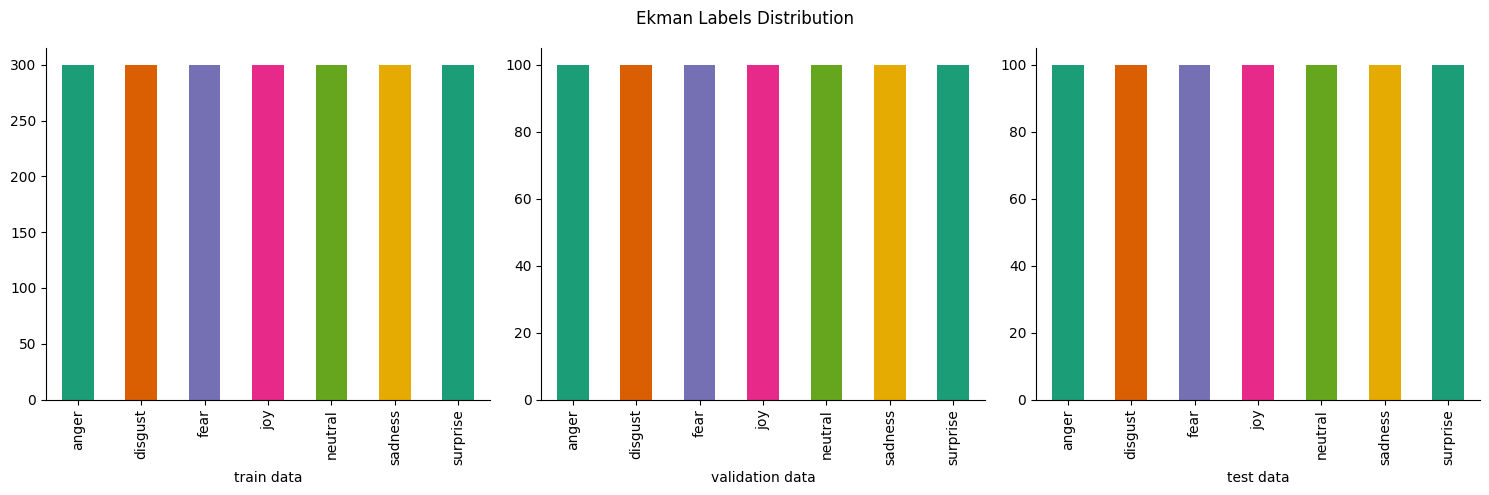

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(1, 5))
fig.suptitle('Ekman Labels Distribution')
plot_data_distribution(df=dataset['train'], ax=axes[0], xlabel='train data')
plot_data_distribution(df=dataset['val'],   ax=axes[1], xlabel='validation data')
plot_data_distribution(df=dataset['test'],  ax=axes[2], xlabel='test data')
plt.tight_layout()

<a name="classification"></a>
# **Section 3: Emotion Classification**


This section shows you how to classify emotions using BERT and T5 models (available at <a herf="https://huggingface.co/">Hugging Face</a>). The text classification involves two main processes:</br>

*  Data pre-processing - transforms input data to required input format and tokenises text (maps each word a word id) to create a vector.
*  Text classification - passes the input text vector to an emotion classifier to identify emotion categories.

The following steps show how to tokenize text and create emotion classifiers based on BERT and T5.

Install and import required packages.

In [ ]:
!pip install pytorch_lightning
!pip install csv-logger
!pip install lightning

In [ ]:
from transformers import BertModel
from transformers import BertTokenizer
from transformers import T5Tokenizer, T5ForConditionalGeneration
from torch.utils.data import DataLoader, Dataset
from torch import nn
import pytorch_lightning as pl
import torch
from lightning.pytorch.loggers import CSVLogger
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, AutoModelWithLMHead

The code below checks availablity of processors (CPU or GPU) in CoLab space.

In [ ]:
# cuda means GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## BERT Emotion Classifier

Below we explain further technical details.  

Firstly, we need to tokenise text and create emotion classifier. The first step is to create a Python class to store our data. We use ```torch``` ```Dataset```, which can be used to store text and their labels accessible using index IDs. Below id a sample code.  

```python
class BERTDataset(Dataset):
    def __init__(self, df, datacolumn, labelcolumn):
        self.data = df
        self.texts = self.data[datacolumn].tolist()
        self.labels = self.data[labelcolumn].tolist()

    def __len__(self):
        return(len(self.texts))
```

Here the ```BERTDataset``` class stores text and their labels in ```self.texts``` and ```self.labels``` respectively. The ```datacolumn``` and ```labelcolumn``` indicate from which columns the texts and labels are selected.


To access the data using index, we create ```__getitem__``` function for the ```Dataset``` class. This function can find a text and linked label for an index. Because we need tokenized text, we let the function to return a tokenized text instead, as shown below.

```python
def __getitem__(self,idx):
        # get text and label by index
        text = self.texts[idx]
        label = self.labels[idx]
        # tokenization
        encoding = self.tokenizer.encode_plus(
                                                text,
                                                max_length = self.max_length,
                                                add_special_tokens = True,
                                                padding = 'max_length',
                                                truncation = True,
                                                return_attention_mask = True,
                                                return_tensors = 'pt',)
        # return tokenized text and its label
        return {'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'label': torch.tensor(label),
                }
```

As we tokenize text in ```__getitem__``` function, we need to include tokenizer to our class as well. Thus, we modify ```BERTDataset``` class to put everything together. The complete ```BERTDataset``` class is shown below.

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, df, tokenizer, max_length, datacolumn, labelcolumn):
        self.data = df
        self.texts = self.data[datacolumn].tolist()
        self.labels = self.data[labelcolumn].tolist()
        # tokenizer and necessary parameters
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return(len(self.texts))

    def __getitem__(self,idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
                                                text,
                                                max_length = self.max_length,
                                                add_special_tokens = True,
                                                padding = 'max_length',
                                                truncation = True,
                                                return_attention_mask = True,
                                                return_tensors = 'pt',)

        return {'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'label': torch.tensor(label),
                }

Now, our dataset and text tokenization are ready. Let's start creating BERT emotion classifier.

First, we need to create a classification layer which is connected to BERT, because BERT itself cannot perform classification task. However, BERT can understand English text and encode the input text into embedding vectors. Next, we pass the vector to the classification layer for emotion classification.

For classification layer, we create a simple neuron network comprise of linear layer, dropout layer, and output layer. Here we  use ```pytorch-lightnight``` for this task, as shown below.  

```python
class BERTClassifier(pl.LightningModule):
    def __init__(self, model, num_class, emotion_index):
        super(BERTClassifier, self).__init__()
        self.model = model
        self.num_class = num_class
        self.emotion_index = emotion_index
        self.pre_classifier = nn.Linear(768, 768)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, self.num_class) # output layer

```

The above is sample code of our ```BERTclassifier```, where we define necessary elements. Next, let's setup the ```forward``` function to connect all these layers and classify emotion.

```python
def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids = input_ids, attention_mask = attention_mask)
        pooler = outputs[0][:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        logits = self.classifier(pooler)

        return logits
```

The ```forward``` function shows the sequence of layers explained previously. This function returns the result of the last layer, which provides classification output.

Next, we create a function for emotion classification by connecting ```BERTDataset``` to ```BERTClassifier```.

```python
def emo_classification(self, dataset):
        predictions = []
        for _d in dataset:
            logits = self(_d['input_ids'].unsqueeze(0), _d['attention_mask'].unsqueeze(0))
            _, pred = torch.max(logits, dim = 1)
            index= pred.numpy()[0]
            predictions.append(self.emotion_index[index])
        return predictions
```


The ```emotion_classification``` process iterates over the dataset to classify emotion for each input text (social media message in our dataset). As we already tokenized the text, this function accesses the tokenized text then passes it to ```forward``` function. Finally, we return the classification results. The code below shows the complete class of ```BERTClassifier```.

In [ ]:
class BERTClassifier(pl.LightningModule):
    def __init__(self, model, num_class, emotion_index):
        super(BERTClassifier, self).__init__()
        self.model = model
        self.num_class = num_class
        self.emotion_index = emotion_index
        self.pre_classifier = nn.Linear(768, 768)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, self.num_class)


    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids = input_ids, attention_mask = attention_mask)
        pooler = outputs[0][:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        logits = self.classifier(pooler)

        return logits

    def emo_classification(self, dataset):
        predictions = []
        for _d in dataset:
            input_ids = _d['input_ids'].unsqueeze(0).to(device)
            attention_mask = _d['attention_mask'].unsqueeze(0).to(device)
            logits = self(input_ids, attention_mask)
            _, pred = torch.max(logits, dim = 1)
            index= pred.cpu().numpy()[0]
            predictions.append(self.emotion_index[index])
        return predictions


With classifier and dataset ready, let's setup parameters and perform the classification.

In [ ]:
# Parameters
CLASSES = 7
DATACOLUMN = 'text'
LABLECOLUMN = 'index'
EMOTION_INDEX = {0: 'anger',
                 1: 'disgust',
                 2: 'fear',
                 3: 'joy',
                 4: 'neutral',
                 5: 'sadness',
                 6: 'surprise'}

We use BERT model called <a href='https://huggingface.co/google-bert/bert-base-uncased'>bert-base-uncased</a>, which is available on Hugging Face website.

In [ ]:
# Download BERT model and initialise BERT classifier.

BERT_MODEL = BertModel.from_pretrained("bert-base-uncased")
BERT_TOKENIZER = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

BERTcls = BERTClassifier(
    model=BERT_MODEL,
    num_class=CLASSES,
    emotion_index = EMOTION_INDEX).to(device)

In [ ]:
# Get data ready
# We sample 10 instances from dataset['test']
# You can try the whole data by replacing data with dataset['test']

data = dataset['test'].sample(n=10, random_state=1)

Bertdata = BERTDataset(df = data,
                       tokenizer = BERT_TOKENIZER,
                       max_length = BERT_TOKENIZER.model_max_length,
                       datacolumn = DATACOLUMN,
                       labelcolumn = LABLECOLUMN)

In [ ]:
# Emotion classification
bert_pred = BERTcls.emo_classification(Bertdata)
bert_pred

e:\miniconda3\envs\phdenv\Lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


['neutral',
 'neutral',
 'neutral',
 'sadness',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'sadness']

## T5 Emotion Classifier

We have shown how to use BERT for emotion classification. For T5, the process is similar. We need to create ```Dataset``` and T5 classifier. The main difference is that T5 can generate text on its own and we do not need to create a classification layer. Therefore, we can use T5 to directly predict emotion of text.  

For text generation, we need to be careful of the length of generated text because we do not want the classifier to over generate. In our case, we want the model to just return a emotion category instead of a full sentences. Therefore, we need to limit the length of generated text. To do that, let's first check the length of tokenized emotion category labels.

In [ ]:
# load T5 and tokenizer

T5_MODEL = T5ForConditionalGeneration.from_pretrained("t5-small", return_dict=True)
T5_TOKENIZER = T5Tokenizer.from_pretrained("t5-small")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


As shown above, we select T5 model named <a href='https://huggingface.co/google-t5/t5-small'>t5-small</a>. It is the smallest among T5 model series.

In [ ]:
# Tokenise emotion categories.
DATACOLUMN = 'text'
LABLECOLUMN = 'emotion'

generated_output_length = [(e, len(T5_TOKENIZER.encode(e)), T5_TOKENIZER.encode(e)) for e in dataset['train'][LABLECOLUMN].unique()]
output_length_df = pd.DataFrame(generated_output_length, columns=['Emotion', 'No. tokens', 'Token ids'])
output_length_df

,Emotion,No. tokens,Token ids
0,anger,2,"[11213, 1]"
1,disgust,2,"[27635, 1]"
2,fear,2,"[2971, 1]"
3,joy,2,"[3922, 1]"
4,neutral,2,"[7163, 1]"
5,sadness,2,"[24784, 1]"
6,surprise,2,"[4158, 1]"


The above output shows that the maximum token lengths is 2. This means that we can limit the length of generated text to 2.

Next, let's define our dataset and T5 classifier. For the dataset, we use the same class for implementing ```Dataset```. Unlike BERT, before text tokenization, we need to add prompt instruction as a prefix to tell T5 what to do. In our example, we add "emotion classification:" before the text. Then tokenize the input text.

In [ ]:
class T5Dataset(Dataset):
    def __init__(self, df, tokenizer, text_maxlength, label_maxlength, datacolumn, labelcolumn):
        self.data = df
        self.texts = self.data[datacolumn].tolist()
        self.labels = self.data[labelcolumn].tolist()
        self.tokenizer = tokenizer
        self.text_maxlength = text_maxlength
        self.label_maxlength = label_maxlength

    def __len__(self):
        return(len(self.texts))

    def __getitem__(self,idx):
        # T5 transformers perform on different tasks by prepending the particular prefix to the input text.
        # Because T5 is text-to-text transformer, in order to avoid data type mismatch, the data type must be string
        text = "emotion classification:" + str(self.texts[idx])
        label = str(self.labels[idx]).lower()
        text_tokenizer = self.tokenizer(text, max_length=self.text_maxlength, padding="max_length")
        label_tokenizer = self.tokenizer(label, max_length=self.label_maxlength, padding="max_length")

        return {
            "input_ids": torch.tensor(text_tokenizer["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(text_tokenizer["attention_mask"], dtype=torch.long),
            "label_ids": torch.tensor(label_tokenizer["input_ids"], dtype=torch.long),
            "label_mask": torch.tensor(label_tokenizer["attention_mask"], dtype=torch.long)
        }

With regards to classifier, T5 provides a built-in function which takes tokenised text as input and generates classification output. Therefore, we do not need to create a ```forward``` function as with BERT.

In [ ]:
class T5Classifier(pl.LightningModule):
    def __init__(self, model, tokenizer, generated_max_length):
        super(T5Classifier, self).__init__()
        self.model = model
        self.tokenizer = tokenizer
        self.generated_max_length = generated_max_length

    def emo_classification(self,dataset):
        predictions = []
        for _d in dataset:
            input_ids = _d['input_ids'].unsqueeze(0).to(device)
            attention_mask = _d['attention_mask'].unsqueeze(0).to(device)
            pred = self.model.generate(input_ids,
                                       max_length=self.generated_max_length)
            _pred = self.tokenizer.decode(pred[0],skip_special_tokens=True)
            predictions.append(_pred)
        return predictions


The classification process is similar to that of BERT. Firstly, we iterate over the pieces of input text (social media messages in our case) and predict emotion for each them.  

Now, the classifier and dataset are ready, let's try the classification.

In [ ]:
# Output max length
OUTPUTLENGTH = output_length_df['No. tokens'].max()

T5cls = T5Classifier(
    model=T5_MODEL,
    tokenizer=T5_TOKENIZER,
    generated_max_length=OUTPUTLENGTH).to(device)

t5data = T5Dataset(df = data,
                       tokenizer = T5_TOKENIZER,
                       text_maxlength = T5_TOKENIZER.model_max_length,
                       label_maxlength = OUTPUTLENGTH,
                       datacolumn = DATACOLUMN,
                       labelcolumn = LABLECOLUMN)

In [ ]:
# classification result
t5_pred = T5cls.emo_classification(t5data)
t5_pred

['', '', '', '', '', '', '', '', '', '']

So far, we have explained how to classify emotions using BERT and T5. In the next section, we will show you how to evaluate the performances of the two classifiers.

<a name="evaluation"></a>
# **Section 4: Model Evaluation**

In this section, we will evaluate performances of two emotion classifiers, BERT and T5. We will use accuracy to compare their performaces. First let's define an accuracy as: the ratio of number of correctly predicted texts over the total number of texts. The ```accuracy``` function code is shown below.

In [ ]:
# accuracy function
def accuracy(actual_label,pred):
    return sum([1 if a == p else 0 for a,p in zip(actual_label,pred)])/len(pred)

Next, let's look at classification results.

In [ ]:
data = data.loc[:, ['text','emotion']]
data['bert'] = bert_pred
data['t5'] = t5_pred
data

,text,emotion,bert,t5
681,Was expecting a horrifically broken ankle. You...,surprise,neutral,
626,"Wow, didn't expect this thread to get philosop...",surprise,neutral,
329,"Funny, coming from the tool circle jerk reddit.",joy,neutral,
620,I wonder why you're sitting at -2 for that com...,surprise,sadness,
399,Wanna trade lives? I'd gladly take normal heig...,joy,neutral,
443,"Yes, I have. What are the towns of which you s...",neutral,neutral,
274,[NAME] that is frightening...,fear,surprise,
529,I don't think you're allowed to administer a v...,sadness,neutral,
358,She has at least 12 elbows and all of them are...,joy,neutral,
268,After 8? I'm afraid after 5. It gets dark here...,fear,sadness,


Next, let's calculate the accuracy of the classifiers and compare their performances.

In [ ]:
performance = {}
performance['bert'] = [accuracy(data.emotion.tolist(), data.bert.to_list())]
performance['t5'] = [accuracy(data.emotion.tolist(), data.t5.to_list())]

perm = pd.DataFrame(performance)
perm

,bert,t5
0,0.1,0.0


<Axes: >

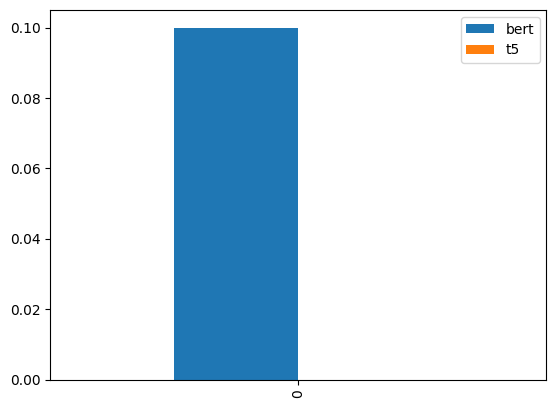

In [ ]:
perm.plot.bar()

As shown above, the performances of these classifiers are quit poor. In the next section, we will show how to improve the performance of them by fine-tuning the LLMs.

<a name="fine-tuning"></a>
# **Section 5: Guide to Model Fine-tuning**

To improve performance of the classifiers, we need to fine-tune the LLMs to adapt them for classifying with our specific emotion categories. The fine-tuning is a supervised learning process using pre-classified example data (training data). Each round of training is called epoch. For each epoch, we divine data into batches. The classifiers will learn at the end of each round by updating parameters of LLMs. For the training, we prepared a training data and a validation data.  

For program implementation, we use the BERT and T5 classes defined earlier.

## BERT classifier tuning  

Before we dive into the fine-tuning, we first need to define a function for splitting the training data into batches. It can also be used to create data for validating and testing. We use ```DataModule``` of ```pyTorch-lightning``` for this function. The ```DataModule``` stores training, validating and test datasets and facilitates batch process of fine-tuning. The ```DataModule``` class is shown below.

```python
class BERTDataModule(pl.LightningDataModule):
    def __init__(self, traindf, valdf, testdf, batch_size, tokenizer, max_length, datacolumn, labelcolumn):
        super().__init__()
        # dataset
        self.traindf = traindf
        self.valdf = valdf
        self.testdf = testdf
        self.datacolumn = datacolumn
        self.labelcolumn = labelcolumn
        # parameters
        self.batch_size = batch_size
        self.max_length = max_length
        # tokenizer
        self.tokenizer = tokenizer

    def setup(self, stage=None):
        self.train_dataset = BERTDataset( self.traindf, self.tokenizer, self.max_length, self.datacolumn, self.labelcolumn)
        self.val_dataset = BERTDataset( self.valdf, self.tokenizer, self.max_length, self.datacolumn, self.labelcolumn)
        self.test_dataset = BERTDataset( self.testdf, self.tokenizer, self.max_length, self.datacolumn, self.labelcolumn)
        
```

In the above setup functions, ```BERTDataModule``` creates ```BERTDataset``` objects of training, validating, and test datasets, and stores them. Then, using the following functions, we can access the ```BERTDataset``` objects.

```python
    def train_dataloader(self):
        return DataLoader( self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader( self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)
```

The above functions are to be called during training, validating, and testing steps, and return ```DataLoader``` object with parameters of ```batch_size```. The complete class is shown below.



In [ ]:
class BERTDataModule(pl.LightningDataModule):
    def __init__(self, traindf, valdf, testdf, batch_size, tokenizer, max_length, datacolumn, labelcolumn):
        super().__init__()
        # dataset
        self.traindf = traindf
        self.valdf = valdf
        self.testdf = testdf
        self.datacolumn = datacolumn
        self.labelcolumn = labelcolumn
        # parameters
        self.batch_size = batch_size
        self.max_length = max_length
        # tokenizer
        self.tokenizer = tokenizer

    def setup(self, stage=None):
        self.train_dataset = BERTDataset( self.traindf, self.tokenizer, self.max_length, self.datacolumn, self.labelcolumn)
        self.val_dataset = BERTDataset( self.valdf, self.tokenizer, self.max_length, self.datacolumn, self.labelcolumn)
        self.test_dataset = BERTDataset( self.testdf, self.tokenizer, self.max_length, self.datacolumn, self.labelcolumn)

    def train_dataloader(self):
        return DataLoader( self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader( self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader( self.test_dataset, batch_size=self.batch_size)

Now we have set up ```DataModule``` for fine-tuning.<br>

Next, let's modify our ```BERTClassifier```. We need to add three functions for training, validating, and testing.  

```python
def training_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        logits = self(input_ids, attention_mask)
        _, preds = torch.max(logits, dim = 1)
        loss = nn.CrossEntropyLoss()(logits, labels)

        self.log('train_loss', loss, on_epoch=True)
        self.log('train_acc',(preds == labels).sum() / len(labels), on_epoch=True)
        return loss
```

The function ```training_step``` takes as input the batch data provided by the ```train_dataloader``` of ```BERTDataModule```. For each batch, the input data is passed to ```forward``` function. The function calculates the loss. We need to keep tracking loss and accuracy during the training process.



For the ```validating_step```, the code is similar to that of ```training_step```. However, during validation, the function will call ```val_dataloader``` of the ```BERTDataModule``` to obtain validation dataset. The rest of the process is the same.

```python
def validation_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["label"]

    logits = self(input_ids, attention_mask)
    _, preds = torch.max(logits, dim = 1)
    loss = nn.CrossEntropyLoss()(logits, labels)

    self.log('val_loss', loss)
    self.log('val_acc', (preds == labels).sum() / len(labels))
    return loss

```

In the ```test_step```, we do not need to return the loss as we only want to test the classifier against the test dataset. Again, the process is similar to that of the other two steps.

```python
    def test_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]
        logits = self(input_ids=input_ids,
                      attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(logits, labels)
        _, preds = torch.max(logits, dim = 1)

        self.log('test_loss', loss)
        self.log('test_acc', (preds == labels).sum() / len(labels))
```

So far, we have defined all functions. The last step is to define an optimizer for updating our classifiers. The optimizer needs parameters such as learning rate, number of training steps, and number of warmup steps. These parameters are set up during classifier initialising step. In our example, we use Adam optimizer as shown below.

```python
    def configure_optimizers(self):
        optimizer = AdamW(self.model.parameters(), lr=self.learning_rate)
        scheduler = get_linear_schedule_with_warmup(
                optimizer, num_warmup_steps=0,
                num_training_steps=self.epoch*self.train_size)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}
```

The modified ```BERTClassifier``` is shown below.

In [ ]:
class BERTClassifier(pl.LightningModule):
    def __init__(self, model, num_class, learning_rate, epoch, train_size):
        super(BERTClassifier, self).__init__()
        self.model = model
        self.num_class = num_class
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.train_size = train_size
        self.pre_classifier = nn.Linear(768, 768)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, self.num_class)


    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids = input_ids, attention_mask = attention_mask)
        pooler = outputs[0][:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        logits = self.classifier(pooler)

        return logits

    def training_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        logits = self(input_ids, attention_mask)
        _, preds = torch.max(logits, dim = 1)
        loss = nn.CrossEntropyLoss()(logits, labels)

        self.log('train_loss', loss, on_epoch=True)
        self.log('train_acc',(preds == labels).sum() / len(labels), on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        logits = self(input_ids, attention_mask)
        _, preds = torch.max(logits, dim = 1)
        loss = nn.CrossEntropyLoss()(logits, labels)

        self.log('val_loss', loss)
        self.log('val_acc', (preds == labels).sum() / len(labels))
        return loss

    def test_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]
        logits = self(input_ids=input_ids,
                      attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(logits, labels)
        _, preds = torch.max(logits, dim = 1)

        self.log('test_loss', loss)
        self.log('test_acc', (preds == labels).sum() / len(labels))

    def configure_optimizers(self):
        optimizer = AdamW(self.model.parameters(), lr=self.learning_rate)
        scheduler = get_linear_schedule_with_warmup(
                optimizer, num_warmup_steps=0,
                num_training_steps=self.epoch*self.train_size)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}

Next, let's set up parameters, data module, and classifier.

In [ ]:
# parameters
EPOCH = 2 # two rounds of training
CLASSES = 7 # emotion categories
BATCH_SIZE = 8
LEARNING_RATE = 2e-5
TRAIN_SIZE = len(dataset['train'])
MAX_LENGTH = BERT_TOKENIZER.model_max_length #512

DATACOLUMN = 'text'
BERTLABLECOLUMN = 'index'

In [ ]:
# Datamodule
BERTdata_module = BERTDataModule(traindf=dataset['train'],
                               valdf=dataset['val'],
                               testdf=dataset['test'],
                               tokenizer=BERT_TOKENIZER,
                               batch_size=BATCH_SIZE,
                               max_length=MAX_LENGTH,
                               datacolumn=DATACOLUMN,
                               labelcolumn=BERTLABLECOLUMN)
BERTdata_module.setup()

In [ ]:
# Classifier
BERTcls = BERTClassifier(
    model=BERT_MODEL,
    num_class=CLASSES,
    learning_rate=LEARNING_RATE,
    epoch=EPOCH,
    train_size=TRAIN_SIZE)

# Unblock to print classifier structure
# BERTcls

Now we create a log file to record fine-tuning performance and losses using ```CSVLogger```. For the fine-tuning, we use ```pytorch-lightnight``` ```Trainer```.

In [ ]:
# Setup save path for log file
logger = CSVLogger("./logs", name='BERT_exp', version=1)

# Using pytorch trainer for tuning
trainer = pl.Trainer(
    accelerator="auto",
    devices="auto",
    max_epochs=EPOCH,
    precision="16-mixed",
    logger=logger)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Before we start fine-tuning, let's first test the classifier. Previously, we only tested based on a small samples of our test dataset. Now, we will test the classifier on the whole test dataset.

In [ ]:
trainer.test(BERTcls, BERTdata_module)

You are using a CUDA device ('NVIDIA GeForce RTX 3070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
e:\miniconda3\envs\phdenv\Lib\site-packages\lightning\fabric\loggers\csv_logs.py:268: Experiment logs directory ./logs\BERT_exp\version_1 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.1485714316368103
        test_loss            1.949115514755249
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.949115514755249, 'test_acc': 0.1485714316368103}]

As we can see, the test result is quit poor. Let's start tuning then test it again.

In [ ]:
trainer.fit(BERTcls, BERTdata_module)

e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:653: Checkpoint directory ./logs\BERT_exp\version_1\checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
e:\miniconda3\envs\phdenv\Lib\site-packages\transformers\optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(

  | Name           | Type      | Params
---------------------------------------------
0 | model          | BertModel | 109 M 
1 | pre_classifier | Linear    | 590 K 
2 | dropout        | Dropout   | 0     
3 | classifier     | Linear    | 5.4 K 
---------------------------------------------
110 M     Trainable params
0         Non-trainable params
110 M     Total params
440.313   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [ ]:
# Testing after fine-tuning
trainer.test(BERTcls, BERTdata_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7699999809265137
        test_loss            0.75872802734375
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.75872802734375, 'test_acc': 0.7699999809265137}]

Now we can see the significant improvement of the classifier's performance.

Next, let's review tuning/testing loss and performance. The information is stored in the log file directory './logs/BERT_exp'.

In [ ]:
def GetTuningStats(path):
    metrices = pd.read_csv(path)
    training_metric = metrices[['train_acc_epoch','train_loss_epoch']].dropna().reset_index(drop=True)
    validate_metric = metrices[['val_acc','val_loss']].dropna().reset_index(drop=True)
    testing_metric = metrices[['test_acc']].dropna().reset_index(drop=True)
    merge_matrices = pd.merge(training_metric,validate_metric, left_index=True, right_index=True)
    return testing_metric, merge_matrices

In [ ]:
BERT_performance, BERT_losses = GetTuningStats('./logs/BERT_exp/version_1/metrics.csv')
BERT_performance

,test_acc
0,0.148571
1,0.770000


The improvement is obvious and significant!!!

Let's take a look at plot of the losses.

<Axes: >

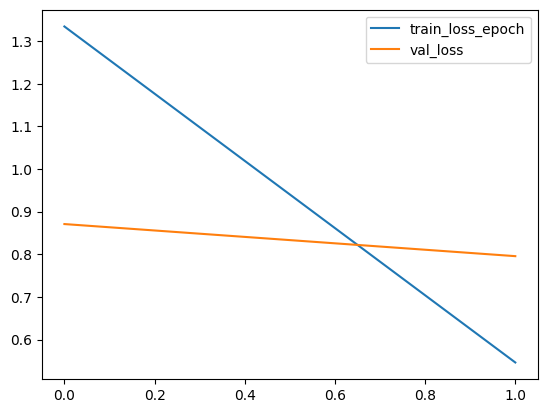

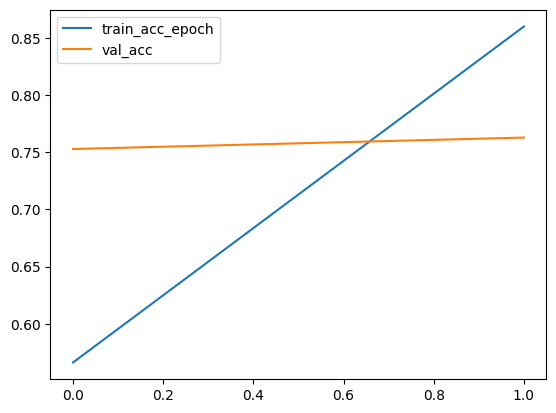

In [ ]:
# Losses of each epoch
BERT_losses[['train_loss_epoch','val_loss']].plot()
# Accuracy of each epoch
BERT_losses[['train_acc_epoch','val_acc']].plot()

The code below shows how to save and load the classifier for future use.

In [ ]:
# # saving
# torch.save(BERTcls.state_dict(), './bert.pt')
# # loading
# saved_model = BERTClassifier(
#     model=BERT_MODEL,
#     num_class=CLASSES,
#     learning_rate=LEARNING_RATE,
#     epoch=EPOCH,
#     train_size=TRAIN_SIZE)
# saved_model.load_state_dict(torch.load('./bert.pt'))
# saved_model.eval()

***

## T5 tuning

Tuning process of T5 is similar to that of BERT. We need to create ```DataModule``` and add training, testing, validating functions to ```T5Classifier```. We also need to add optimizer to the classifier.  

The code below shows ```T5DatModule```.

In [ ]:
class T5DataModule(pl.LightningDataModule):
    def __init__(self, traindf, valdf, testdf, batch_size, tokenizer, text_maxlength, label_maxlength, datacolumn, labelcolumn):
        super().__init__()
        # dataset
        self.datacolumn = datacolumn
        self.labelcolumn = labelcolumn
        self.traindf = traindf
        self.valdf = valdf
        self.testdf = testdf
        # parameters
        self.batch_size = batch_size
        self.text_maxlength = text_maxlength
        self.label_maxlength = label_maxlength
        # tokenizer
        self.tokenizer = tokenizer

    def setup(self, stage=None):
        self.train_dataset = T5Dataset( self.traindf, self.tokenizer, self.text_maxlength, self.label_maxlength, self.datacolumn, self.labelcolumn)
        self.val_dataset = T5Dataset( self.valdf, self.tokenizer, self.text_maxlength, self.label_maxlength, self.datacolumn, self.labelcolumn)
        self.test_dataset = T5Dataset( self.testdf, self.tokenizer, self.text_maxlength, self.label_maxlength, self.datacolumn, self.labelcolumn)

    def train_dataloader(self):
        return DataLoader( self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader( self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader( self.test_dataset, batch_size=self.batch_size)

```T5DataModule``` is similar to that of BERT. The main difference is that it stores ```T5Dataset``` which needs different parameters.

In the previous section, we did not need a ```forward``` function because we only generated emotions. However, for fine-tuning, we need to define a ```forward``` function to return loss.

```python
    def forward(self, input_ids, attention_mask, labels=None, decoder_attention_mask=None):
        outputs = self.model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels,
                        decoder_attention_mask=decoder_attention_mask)
        return outputs.loss, outputs.logits
```

The ```forward``` function passes a batch input through the model (T5). Then, it returns loss.  

Because the ```forward``` function returns loss, the ```training_step``` function directly returns (passes on) loss from the ```forward``` function. This function also records loss and training performance. For testing training performance, we use the model's ```generate``` function to generate emotion category label, then compare it with corresponding label in the train data.



```python
    def training_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label_ids"]
        decoder_attention_mask = batch["label_mask"]

        loss, output = self(input_ids, attention_mask, labels, decoder_attention_mask)
        pred = self.model.generate(input_ids=input_ids,
                                     attention_mask=attention_mask,
                                     max_length=self.generated_max_length)

        self.log('train_acc', self.accuracy_score(output, labels), on_epoch=True)
        self.log('train_loss', loss,  on_epoch=True)

        return loss
```

The accuracy evaluation function is defined as follows.  

```python
    def accuracy_score(self,preds,labels):
        _preds = [self.tokenizer.decode(p,skip_special_tokens=True) for p in preds]
        _labels = [self.tokenizer.decode(l,skip_special_tokens=True) for l in labels]
        return sum([1 if _p==_l else 0 for _p ,_l in zip(_preds,_labels)])/len(_labels)
```

Here we decode the generated text and label, then calculate and return the accuracy score.

Validating process is similar to the training. For the testing step, we use T5 to generate emotion category labels and call ```accuracy_score``` function to evaluate the performance of the classifier. The optimizer used for T5 is similar to that of BERT's. Therefore, ```T5Classifier``` can be defined as follows.

In [ ]:
class T5Classifier(pl.LightningModule):
    def __init__(self, model, tokenizer, epoch, train_size, generated_max_length, learning_rate):
        super(T5Classifier, self).__init__()
        self.model = model
        self.tokenizer = tokenizer
        self.epoch = epoch
        self.train_size = train_size
        self.generated_max_length = generated_max_length
        self.learning_rate = learning_rate

    def forward(self, input_ids, attention_mask, labels=None, decoder_attention_mask=None):
        outputs = self.model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels,
                        decoder_attention_mask=decoder_attention_mask)
        return outputs.loss, outputs.logits

    def accuracy_score(self,preds,labels):
        _preds = [self.tokenizer.decode(p,skip_special_tokens=True) for p in preds]
        _labels = [self.tokenizer.decode(l,skip_special_tokens=True) for l in labels]
        return sum([1 if _p==_l else 0 for _p ,_l in zip(_preds,_labels)])/len(_labels)


    def training_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label_ids"]
        decoder_attention_mask = batch["label_mask"]

        loss, output = self(input_ids, attention_mask, labels, decoder_attention_mask)
        pred = self.model.generate(input_ids=input_ids,
                                   max_length=self.generated_max_length)

        self.log('train_acc', self.accuracy_score(pred, labels), on_epoch=True)
        self.log('train_loss', loss,  on_epoch=True)

        return loss

    def validation_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label_ids"]
        decoder_attention_mask = batch["label_mask"]

        loss, output = self(input_ids, attention_mask, labels, decoder_attention_mask)

        pred = self.model.generate(input_ids=input_ids,
                                   max_length=self.generated_max_length)

        self.log('val_acc', self.accuracy_score(pred, labels))
        self.log('val_loss', loss)

        return loss

    def test_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        output = self.model.generate(input_ids=input_ids,
                                     max_length=self.generated_max_length)
        self.log('test_acc', self.accuracy_score(output, batch["label_ids"]))

    def configure_optimizers(self):
        optimizer = AdamW(self.model.parameters(), lr=self.learning_rate)
        scheduler = get_linear_schedule_with_warmup(
                optimizer, num_warmup_steps=0,
                num_training_steps=self.epoch*self.train_size)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}

Now, let's set up parameters, data module, and classifier.

In [ ]:
# parameters
EPOCH = 2
BATCH_SIZE = 8
LABEL_LENGTH = 2
LEARNING_RATE = 2e-5
MODEL_MAX_LENGTH = T5_TOKENIZER.model_max_length

DATACOLUMN = 'text'
T5LABELCOLUMN = 'emotion'

In [ ]:
# datamodule
T5data = T5DataModule(traindf = dataset['train'],
                      valdf = dataset['val'],
                      testdf = dataset['test'],
                      batch_size = BATCH_SIZE,
                      tokenizer = T5_TOKENIZER,
                      text_maxlength = MODEL_MAX_LENGTH,
                      label_maxlength = LABEL_LENGTH,
                      datacolumn = DATACOLUMN,
                      labelcolumn = T5LABELCOLUMN)
T5data.setup()

In [ ]:
# Save directory
logger = CSVLogger("./logs", name='T5_ekman', version=1)

# Classifier
T5cls = T5Classifier(model = T5_MODEL,
                     tokenizer = T5_TOKENIZER,
                     epoch = EPOCH,
                     train_size = TRAIN_SIZE,
                     generated_max_length = LABEL_LENGTH,
                     learning_rate=LEARNING_RATE)

In [ ]:
# Trainer for tuning
trainer = pl.Trainer(
    accelerator="auto",
    devices="auto",
    max_epochs=EPOCH,
    precision="16-mixed",
    logger=logger)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Let's evaluate our classifier before tuning first.

In [ ]:
trainer.test(T5cls, T5data)

e:\miniconda3\envs\phdenv\Lib\site-packages\lightning\fabric\loggers\csv_logs.py:268: Experiment logs directory ./logs\T5_ekman\version_1 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc                    0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.0}]

Start tuning

In [ ]:
trainer.fit(T5cls, T5data)

e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:653: Checkpoint directory ./logs\T5_ekman\version_1\checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
e:\miniconda3\envs\phdenv\Lib\site-packages\transformers\optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(

  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 60.5 M
-----------------------------------------------------
60.5 M    Trainable params
0         Non-trainable params
60.5 M    Total params
242.026   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
e:\miniconda3\envs\phdenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


Now, let's evaluate the classifier after tuning.

In [ ]:
trainer.test(T5cls, T5data)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.6228571534156799
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.6228571534156799}]

Next, let's review performance and losses.

In [ ]:
t5_performance , t5_losses = GetTuningStats('./logs/T5_ekman/version_1/metrics.csv')
t5_performance

,test_acc
0,0.000000
1,0.622857


<Axes: >

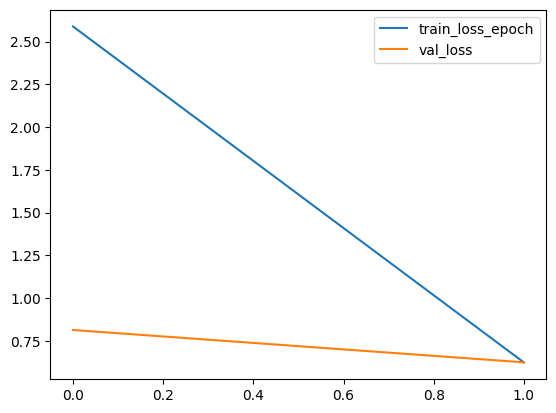

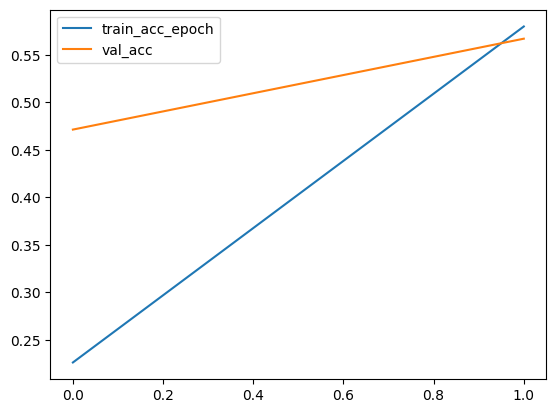

In [ ]:
t5_losses[['train_loss_epoch','val_loss']].plot()
t5_losses[['train_acc_epoch','val_acc']].plot()

We can also save T5 classifier.

In [ ]:
# # saving
# torch.save(T5cls.state_dict(), './t5.pt')
# # loading
# saved_model = T5Classifier(model = T5_MODEL,
                    #  tokenizer = T5_TOKENIZER,
                    #  epoch = EPOCH,
                    #  train_size = TRAIN_SIZE,
                    #  generated_max_length = LABEL_LENGTH,
                    #  learning_rate=LEARNING_RATE)
# saved_model.load_state_dict(torch.load('./t5.pt'))
# saved_model.eval()

Let's compare the performance of the two classifiers before and after tuning.

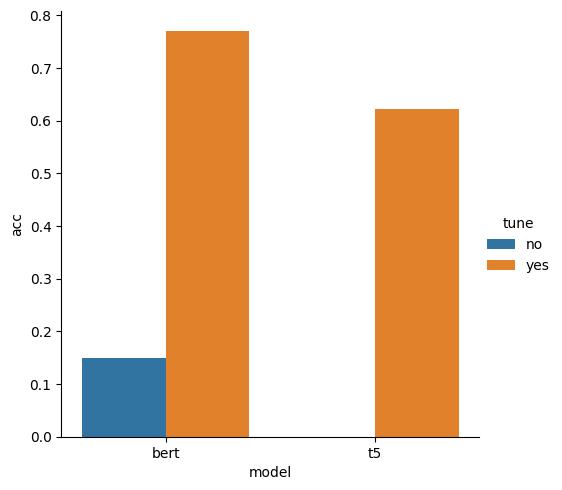

In [ ]:
perm = {'model': ['bert','bert','t5','t5'],
        'tune':['no','yes','no','yes'],
        'acc':[BERT_performance['test_acc'][0],BERT_performance['test_acc'][1],
               t5_performance['test_acc'][0],t5_performance['test_acc'][1]]}
_perm = pd.DataFrame(perm)
g = sns.catplot(x='model', y='acc', hue='tune', data=_perm, kind='bar', height=5, aspect=1)


We can see big differences of accuracy before and after the tuning. The dataset used for training is just a small sample. The full dataset can be download here (<a href='https://huggingface.co/datasets/google-research-datasets/go_emotions'>GoEmotion full dataset</a>). We can improve the performance by tuning with more data.  

Datasets and LLMs are available from website <a href='https://huggingface.co/'>Hugging Face</a>, including tuned models. If you do not want to spend time tuning the models, you can use one from the website.

Let's try some pre-trained models for emotion classification.
We select an emotion classifier named <a href='https://huggingface.co/j-hartmann/emotion-english-distilroberta-base'>j-hartmann/emotion-english-distilroberta-base</a>. The model was trained on six datasets, including the GoEmotion dataset. It is a RoBERTa based model and can classify 7 emotion categories (similar to Ekman's categories). So, let's test it using our test dataset.

In [ ]:
model_name = "j-hartmann/emotion-english-distilroberta-base"
h_tokenizer1 = AutoTokenizer.from_pretrained(model_name)
h_model1 = AutoModelForSequenceClassification.from_pretrained(model_name)

testdata_hg = BERTDataset(df=dataset['test'],
                          tokenizer=h_tokenizer1,
                          max_length=512,
                          datacolumn=DATACOLUMN,
                          labelcolumn=BERTLABLECOLUMN)

trainer = Trainer(model=h_model1)


The model can be download from Hugging Face directly using ```transformer``` by identifying the name of the model. In this case, the name is "j-hartmann/emotion-english-distilroberta-base". Usually, the authors of the model give instruction on how to use the model for simple usage.  

The code below shows how to classify emotions using the model and produce evaluation output.

In [ ]:
predictions = trainer.predict(testdata_hg)
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(h_model1.config.id2label)
actual = dataset['test'].emotion
hg1_acc = accuracy(actual_label= actual, pred=labels)
hg1_acc

  0%|          | 0/88 [00:00<?, ?it/s]

0.7585714285714286

We can see the accuracy is around 0.42.

Next, let's try one more model with T5 based classifier.

In [ ]:

h_model2 = AutoModelWithLMHead.from_pretrained("mrm8488/t5-small-finetuned-emotion").to(device)
h_tokenizer2 = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-emotion")


def get_emotion(text):
  input_ids = h_tokenizer2.encode(text + '</s>', return_tensors='pt').to(device)
  output = h_model2.generate(input_ids=input_ids,
               max_length=2)
  dec = [h_tokenizer2.decode(ids, skip_special_tokens=True) for ids in output]
  label = dec[0]
  return label

def get_performance(data = dataset['test'].text):
  preds = [get_emotion(text) for text in data]
  return accuracy(actual_label=actual,pred=preds)

hg2_acc = get_performance()
hg2_acc

e:\miniconda3\envs\phdenv\Lib\site-packages\transformers\models\auto\modeling_auto.py:1712: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


0.4042857142857143

The above model is <a href='https://huggingface.co/mrm8488/t5-small-finetuned-emotion'>mrm8488/t5-small-finetuned-emotion</a>, which is based on T5-small and is trained using <a href='https://huggingface.co/datasets/dair-ai/emotion'>dair-ai dataset</a>. It can classify text into six emotions excluding neutral. Its performance is comparable to the previous model.  

Next, let's compare the performance of Hugging Face model with our tuned models.

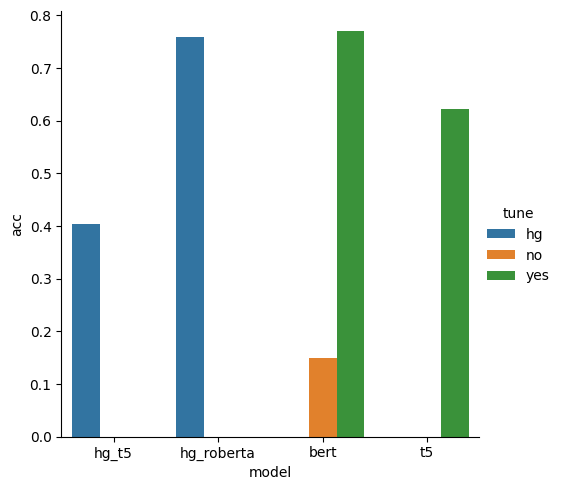

In [ ]:
def addrow(df, row):
    df.loc[-1] = row
    df.index = df.index + 1
    df = df.sort_index()
    return df

__perm = addrow(_perm, ['hg_roberta','hg',hg1_acc])
__perm = addrow(__perm, ['hg_t5','hg',hg2_acc])
g = sns.catplot(x='model', y='acc', hue='tune', data=__perm, kind='bar', height=5, aspect=1)

From the bar charts above, we can see that our tuned models perform better than the models from Hugging Face. However, the models from Hugging Face provide a better starting point compared to our base models. We might be able to achieve better results if we chose these models for tuning!!!    

# Key Takeaways from the Tutorial

We hope you find this tutorial useful, even interesting!

After the tutorial, you will have gained knowledge and hands-on experiences of using LLMs for automatic emotion classification, including tuning them for better results.

You can test the techniques further and develop better emotion classification software using the LLMs in the Hackathon sessions.